# GARCH Stock Forecasting

In [1]:
!pip install arch
!pip install yfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 18.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 60.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 6.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.5 MB/s eta 0:00:00:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.7 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 3.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 2.6 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 40.4 MB/s eta 0:00:0000:0100:01
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=854354 sha256=d2c2b94b936e4aba1908a83f242e546a87b1d6b361fae5b7b6b00d778099

## Read Data

In [3]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf


## DIS Volatility

In [4]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [5]:
#dis = web.DataReader('DIS', 'yahoo', start=start, end=end)
dis = yf.download('DIS',start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [6]:
returns = 100 * dis.Close.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

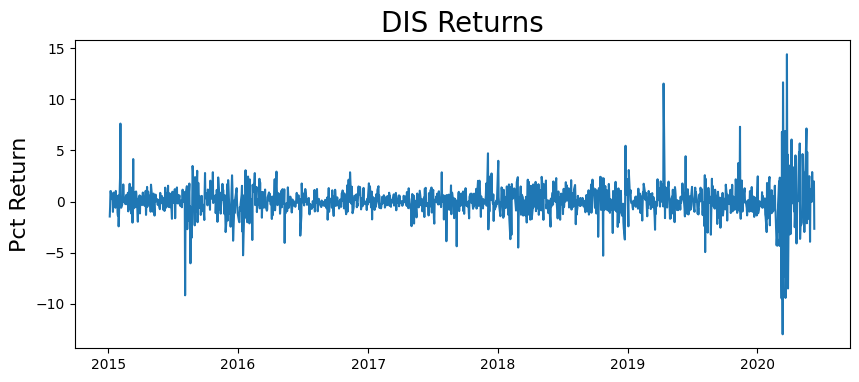

In [7]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

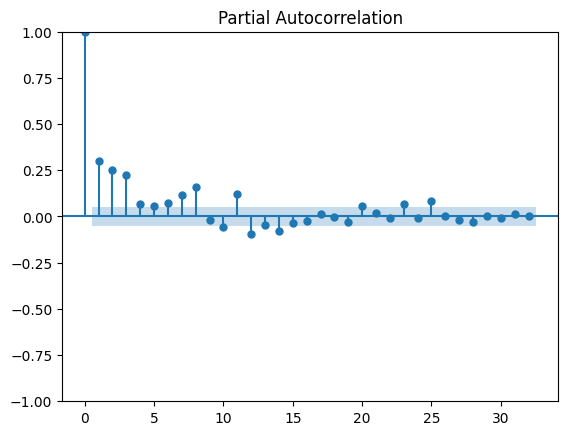

In [8]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [9]:
model = arch_model(returns, p=3, q=3)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 226817739842.71448
Iteration:      2,   Func. Count:     22,   Neg. LLF: 975679599.6168538
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2730.6366984020387
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2484.4387391086784
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2321.37485842304
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2323.9553762024907
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2392.948693067593
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2382.0384560349225
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2297.299869215047
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2297.3150569281315
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2297.1717761461314
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2297.1586277305996
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2297.143636016665
Iteration:     14,   Func. Count:    139,   Neg. LLF: 229

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2297.14
Distribution:                  Normal   AIC:                           4610.28
Method:            Maximum Likelihood   BIC:                           4652.04
                                        No. Observations:                 1367
Date:                Fri, Jun 14 2024   Df Residuals:                     1366
Time:                        01:59:42   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -6.7112e-03  4.330e-02     -0.155      0.877 [-9.157e-02,7.815e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5412      0.190      2.855  4.305e-03    [  0.170,  0.913]
alpha[1]       0.0686  3.957e-02      1.733  8.314e-02 [-8.990e-03,  0.146]
alpha[2]       0.2036  9.906e-02      2.055  3.987e-02  [9.427e-03,  0.398]
alpha[3]       0.3175      0.152      2.094  3.625e-02  [2.033e-02,  0.615]
beta[1]        0.0000      0.164      0.000      1.000    [ -0.322,  0.322]
beta[2]    2.5873e-15  9.647e-02  2.682e-14      1.000    [ -0.189,  0.189]
beta[3]        0.2299      0.169      1.359      0.174    [ -0.102,  0.562]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [12]:
model = arch_model(returns, p=3, q=0)

In [13]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3342.623963807572
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2433500.4211862637
Iteration:      3,   Func. Count:     23,   Neg. LLF: 3847.2261937111602
Iteration:      4,   Func. Count:     30,   Neg. LLF: 130355.71360968299
Iteration:      5,   Func. Count:     37,   Neg. LLF: 2474.7430936435358
Iteration:      6,   Func. Count:     44,   Neg. LLF: 13518.55052475933
Iteration:      7,   Func. Count:     51,   Neg. LLF: 21882.22811407951
Iteration:      8,   Func. Count:     58,   Neg. LLF: 2454.5151558965244
Iteration:      9,   Func. Count:     65,   Neg. LLF: 2321.6558173090516
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2312.4854731553232
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2312.320076596269
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2312.300436402923
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2312.2987737876747
Iteration:     14,   Func. Count:     96,   Neg. LLF: 23

In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2312.30
Distribution:                  Normal   AIC:                           4634.60
Method:            Maximum Likelihood   BIC:                           4660.70
                                        No. Observations:                 1367
Date:                Fri, Jun 14 2024   Df Residuals:                     1366
Time:                        01:59:55   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0102  3.994e-02      0.255      0.799 [-6.811e-02,8.846e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8619      0.138      6.227  4.741e-10    [  0.591,  1.133]
alpha[1]       0.0888  4.543e-02      1.955  5.053e-02 [-2.069e-04,  0.178]
alpha[2]       0.2625  9.141e-02      2.871  4.089e-03  [8.329e-02,  0.442]
alpha[3]       0.3557      0.169      2.099  3.578e-02  [2.363e-02,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [15]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [16]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

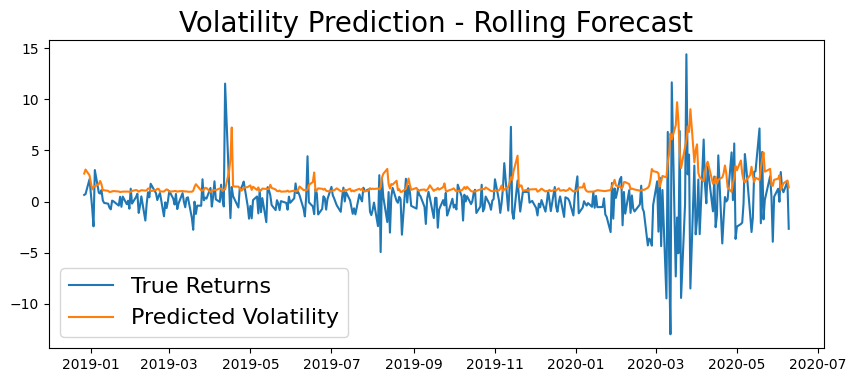

In [17]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [18]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [21]:
#spy = web.DataReader('SPY', 'yahoo', start=start, end=end)
spy = yf.download('SPY',start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [22]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

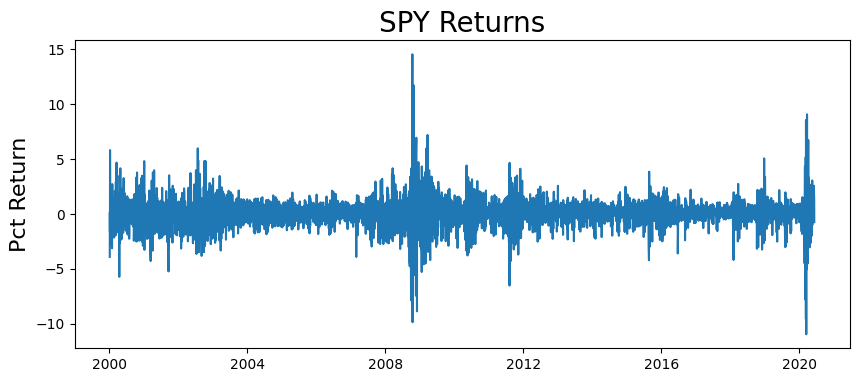

In [23]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

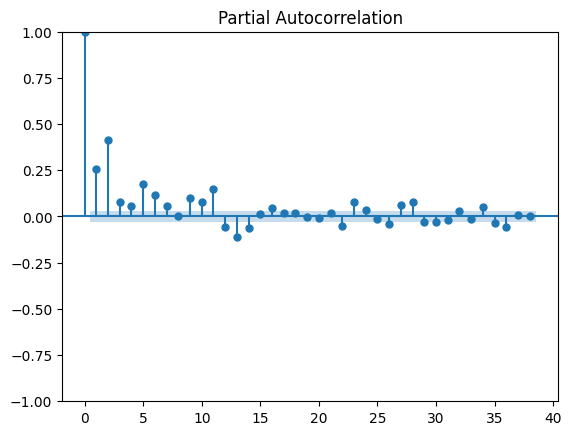

In [24]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [25]:
model = arch_model(returns, p=2, q=2)

In [26]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95281.22632853912
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56723.35373923968
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11217.817134448032
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13359.973196417468
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2150492523.728912
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7229.68596693104
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7085.302560753926
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7055.817240916265
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7052.973800463578
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7052.313034965893
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7052.31255967561
Iteration:     12,   Func. Count:    104,   Neg. LLF: 7052.312558759281
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.312558759281
            Iterations: 12
 

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7052.31
Distribution:                  Normal   AIC:                           14116.6
Method:            Maximum Likelihood   BIC:                           14155.9
                                        No. Observations:                 5140
Date:                Fri, Jun 14 2024   Df Residuals:                     5139
Time:                        02:00:54   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0664  1.096e-02      6.055  1.407e-09 [4.487e-02,8.783e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0406  9.950e-03      4.077  4.567e-05 [2.106e-02,6.007e-02]
alpha[1]       0.0809  2.203e-02      3.671  2.420e-04   [3.769e-02,  0.124]
alpha[2]       0.1328  3.069e-02      4.327  1.511e-05   [7.264e-02,  0.193]
beta[1]        0.3012      0.296      1.017      0.309     [ -0.279,  0.882]
beta[2]        0.4561      0.261      1.749  8.036e-02  [-5.513e-02,  0.967]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [28]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [29]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

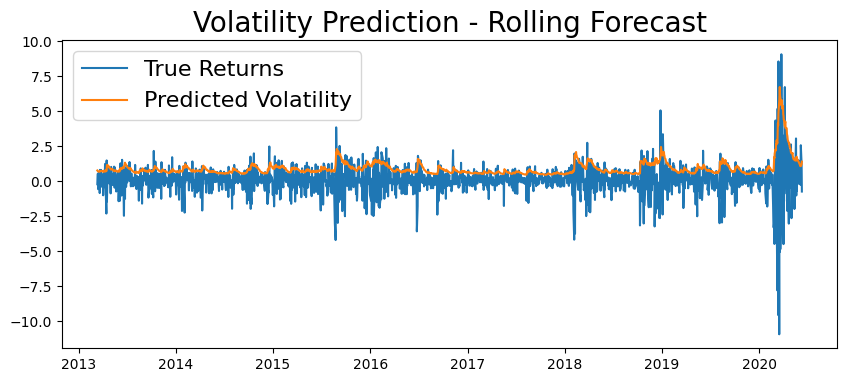

In [30]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [31]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [32]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

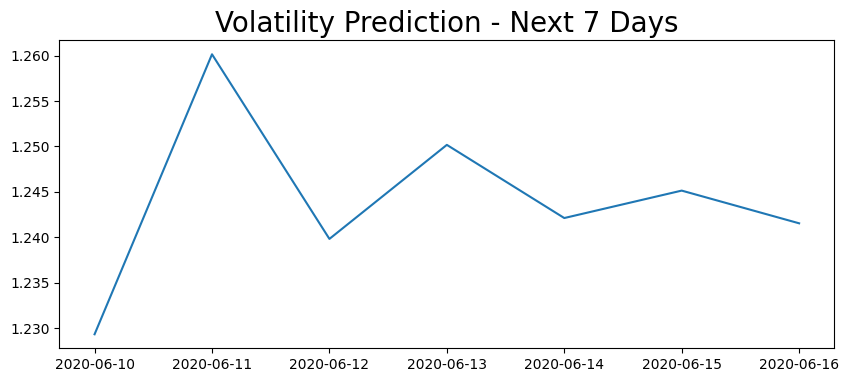

In [33]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)